In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [0]:
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [0]:
class DTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        """Build decision tree classifier."""
        self.n_classes_ = len(set(y))  
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)
        
    def predict(self, X):
        return [self._predict(inputs) for inputs in X]
    
    def _gini(self, y):
        m = y.size
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes_))

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]

        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None

        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):  
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )

                gini = (i * gini_left + (m - i) * gini_right) / m


                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2 
        return best_idx, best_thr
    
    def _grow_tree(self, X, y, depth=0):
        """Build a decision tree by recursively finding the best split."""
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=y.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node
    
    def _predict(self, inputs):
        """Predict class for a single sample."""
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [0]:
df = pd.read_csv('data.csv')

In [0]:
df

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [0]:
df = df.drop(['ID'], axis=1)

In [0]:
df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [0]:
le = LabelEncoder()

In [0]:
df = df.apply(le.fit_transform)

In [0]:
df

,Age,Income,Gender,Marital Status,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [0]:
X=df.iloc[:,:-1]
y=df.iloc[:,4]

In [0]:
X

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [0]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Buys, dtype: int64

In [0]:
clf = DTreeClassifier(max_depth=2)

In [0]:
clf.fit(np.asarray(X), y)

In [0]:
print(clf.predict([[1, 1, 0, 0]]))

[1]


In [0]:
export_graphviz(
            clf,
            out_file="tree.dot",
            feature_names=dataset.feature_names,
            class_names=dataset.target_names,
            rounded=True,
            filled=True,
        )

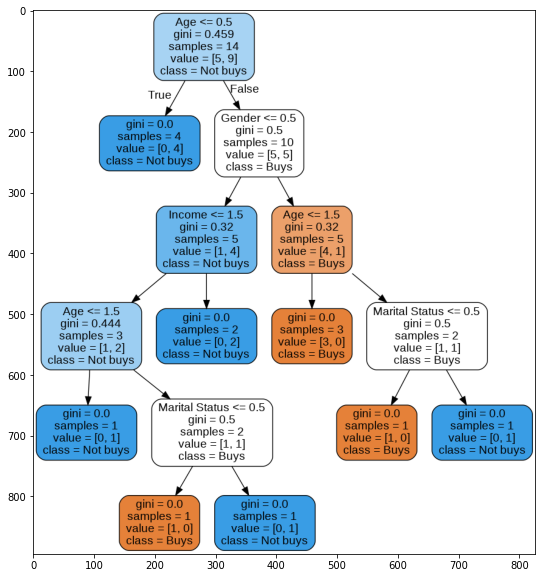

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams["figure.figsize"] = (20,10)
img = mpimg.imread('tree.png')
plt.imshow(img)
plt.show()